## Assignment 1

In this assignment we are going create a model to predict steps. The assignment has 3 parts: cleaning and analysing, correlation and finally lineair regression

### Cleaning and analysing
Import the libraries and data

In [1]:
# importing stuff for drawing plots
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

# open the dataframes with the right separators
step_data = pd.read_csv("steps.csv", sep=";")
survey_data = pd.read_csv('survey.csv')

Merge the data

In [2]:
# merge the two dataframes and show the head of the dataframe
df = survey_data.merge(step_data, on = "id")
df.head(5)

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,3914.0,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


Run describe and analyse it for special values. Maximum weight is 700.. Which is a bit strange.

In [3]:
df.describe()

,id,hh_size,education,height,weight,20-6-2013,21-6-2013,22-6-2013,23-6-2013,24-6-2013,...,4-5-2014,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014
count,929.000000,929.000000,929.000000,928.000000,927.000000,24.000000,243.000000,278.000000,296.000000,354.000000,...,83.000000,78.000000,56.000000,56.000000,49.000000,71.000000,86.000000,81.000000,66.000000,0.0
mean,465.000000,2.342304,2.530678,171.668103,72.833873,3642.416667,9034.724280,10889.636691,7402.847973,8110.370056,...,8466.686747,6897.923077,8434.303571,9870.107143,7209.693878,9570.690141,7614.848837,6805.925926,7505.530303,NaN
std,268.323499,1.226129,1.274491,9.080235,25.902717,3951.910368,6412.774483,6283.204309,6733.291773,5495.536639,...,6923.674171,5915.429173,4960.932295,6812.625746,7539.387846,7264.297875,5521.711875,8458.979146,4706.609481,NaN
min,1.000000,1.000000,1.000000,145.000000,6.000000,164.000000,67.000000,25.000000,43.000000,11.000000,...,726.000000,12.000000,90.000000,88.000000,8.000000,664.000000,103.000000,12.000000,388.000000,NaN
25%,233.000000,1.000000,1.000000,165.000000,61.000000,299.500000,4395.500000,6524.250000,2726.750000,4428.250000,...,3538.000000,2082.000000,5525.750000,5629.500000,3393.000000,5149.000000,3950.000000,2510.000000,4932.000000,NaN
50%,465.000000,2.000000,2.000000,172.000000,71.000000,834.000000,8561.000000,9980.000000,5652.000000,7740.000000,...,5386.000000,6460.000000,7834.500000,9331.000000,5378.000000,7235.000000,6627.000000,3120.000000,6568.500000,NaN
75%,697.000000,3.000000,4.000000,179.000000,81.000000,6060.000000,12182.000000,14338.750000,10472.750000,10464.000000,...,11811.000000,9899.000000,11691.000000,14239.250000,8907.000000,12062.500000,10031.500000,6544.000000,9549.000000,NaN
max,929.000000,11.000000,5.000000,195.000000,700.000000,11157.000000,44944.000000,39165.000000,40392.000000,29862.000000,...,28703.000000,26654.000000,26660.000000,38400.000000,37530.000000,33379.000000,27605.000000,36031.000000,33660.000000,NaN


Create a boxplot of weight

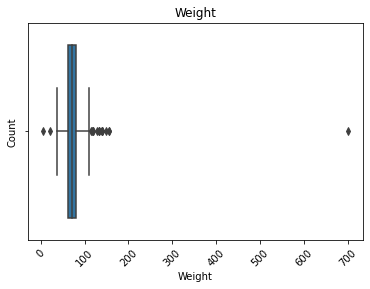

In [4]:
sns.boxplot(x="weight", data=df)
plt.title("Weight")
plt.xlabel("Weight")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Keep only rows with a weight less than 200 and more than 10, since small children don't walk that much.

In [5]:
df=df[(df['weight']<200) & (df['weight']>10)]

Check with info() which column you want to calculate the mean over. Use the attribute verbose to display all columns

In [6]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 925 entries, 0 to 928
Data columns (total 337 columns):
 #    Column       Dtype  
---   ------       -----  
 0    id           int64  
 1    city         object 
 2    gender       object 
 3    age          object 
 4    hh_size      int64  
 5    education    int64  
 6    education_1  object 
 7    height       float64
 8    weight       float64
 9    20-6-2013    float64
 10   21-6-2013    float64
 11   22-6-2013    float64
 12   23-6-2013    float64
 13   24-6-2013    float64
 14   25-6-2013    float64
 15   26-6-2013    float64
 16   27-6-2013    float64
 17   28-6-2013    float64
 18   29-6-2013    float64
 19   30-6-2013    float64
 20   1-7-2013     float64
 21   2-7-2013     float64
 22   3-7-2013     float64
 23   4-7-2013     float64
 24   5-7-2013     float64
 25   6-7-2013     float64
 26   7-7-2013     float64
 27   8-7-2013     float64
 28   9-7-2013     float64
 29   10-7-2013    float64
 30   11-7-2013    float64
 31

Calculate the mean over all columns for each row. Make sure to add axis=1

In [7]:
df['steps_mean']=df.iloc[:,9:336].mean(axis=1)
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,5-5-2014,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,steps_mean
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,4364.0,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630


Create a histogram and boxplot of steps_mean, and calculate mean, median and std dev.

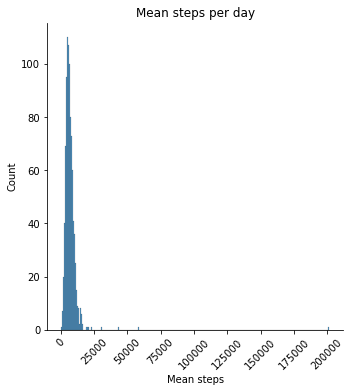

In [8]:
sns.displot(x="steps_mean", kde=False, data=df) #kde=False means we don't get an overlying density plot
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

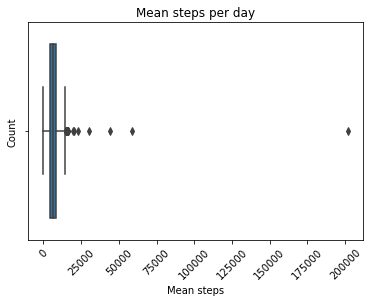

In [9]:
sns.boxplot(x="steps_mean", data=df)
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

In [10]:
print('Median = '+str(df['steps_mean'].median()))
print('Mean = '+str(df['steps_mean'].mean()))
print('St Dev. = '+str(df['steps_mean'].std()))

Median = 6245.006060606061
Mean = 7030.304543728399
St Dev. = 7407.4724608606175


you have clearly some outliers and a right skew, more than 100.000 steps would hypothetically be possible, but you can also see that these outlier influence the mean and standard deviation significantly, so I choose to filter out steps above 25.000.

In [11]:
df=df[df['steps_mean']<25000]

In [12]:
print('Median = '+str(df['steps_mean'].median()))
print('Mean = '+str(df['steps_mean'].mean()))
print('St Dev. = '+str(df['steps_mean'].std()))

Median = 6240.073033707865
Mean = 6696.194875241858
St Dev. = 2940.481454151526


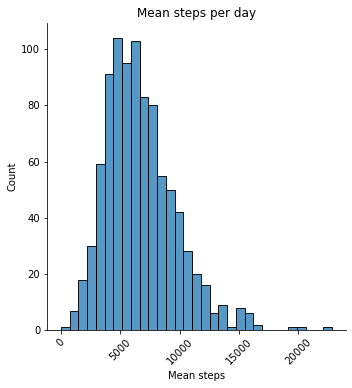

In [13]:
sns.displot(x="steps_mean", kde=False, data=df) #kde=False means we don't get an overlying density plot
plt.title("Mean steps per day")
plt.xlabel("Mean steps")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.show()

Analyse if we see differences in steps for different age groups or educational background

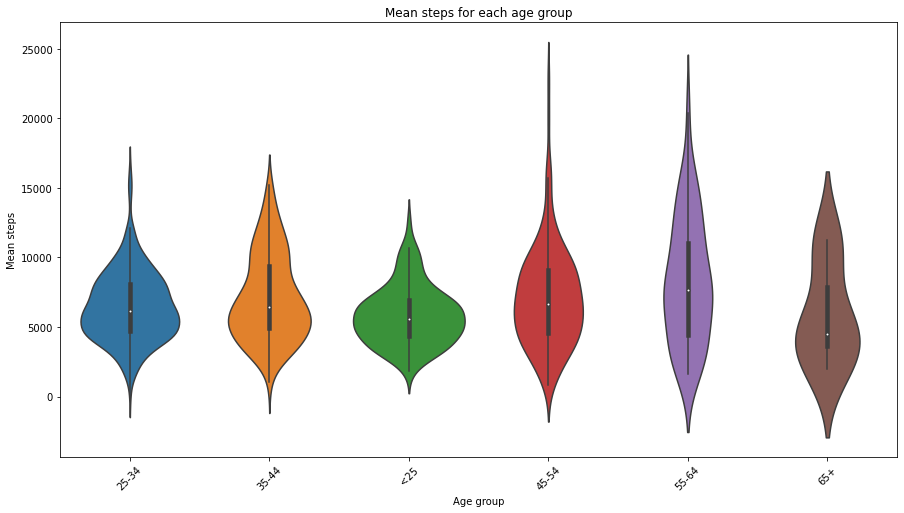

In [14]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
sns.violinplot(x='age',y='steps_mean',data=df)
plt.title('Mean steps for each age group')
plt.xlabel('Age group')
plt.ylabel('Mean steps')
plt.show()

It's clear that young people below 25 walk less and older people who can still walk (between 55 and 64) most, the differences within this group are however also bigger.

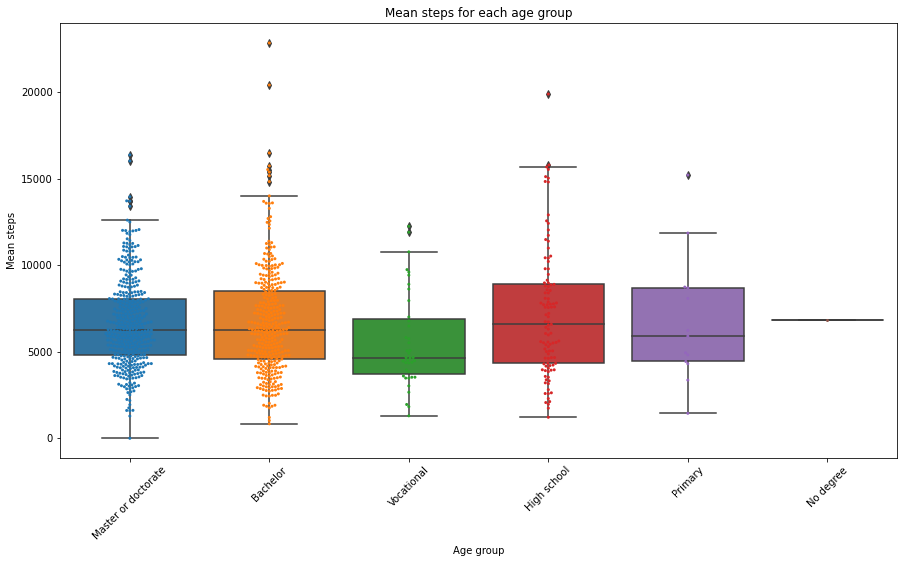

In [15]:
plt.figure(figsize = (15,8))
plt.xticks(rotation=45)
sns.boxplot(x='education_1',y='steps_mean',data=df)
sns.swarmplot(x='education_1',y='steps_mean', size=3, data=df)
plt.title('Mean steps for each age group')
plt.xlabel('Age group')
plt.ylabel('Mean steps')
plt.show()

Educational level does not seem to influence the nr of steps that much. This graph however shows that most people have a bachelor or higher

In [16]:
df['education_1'].value_counts()

Master or doctorate    405
Bachelor               354
High school            105
Vocational              39
Primary                 13
No degree                1
Name: education_1, dtype: int64

### Assignment 2: Correlation

We start with calculating the Body Mass Index, which is a simple calculation using a person’s height and weight. The formula is BMI = kg/m2 where kg is a person’s weight in kilograms and m2 is their height in metres squared.

In [17]:
df['bmi']=df['weight']/(df['height']/100)**2
df.head()

,id,city,gender,age,hh_size,education,education_1,height,weight,20-6-2013,...,6-5-2014,7-5-2014,8-5-2014,9-5-2014,10-5-2014,11-5-2014,12-5-2014,13-5-2014,steps_mean,bmi
0,1,Bordeaux,Male,25-34,4,4,Master or doctorate,178.0,98.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10205.521212,30.930438
1,2,Lille,Male,35-44,1,3,Bachelor,180.0,77.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5687.423313,23.765432
2,3,Montpellier,Male,25-34,2,2,Master or doctorate,180.0,83.0,NaN,...,NaN,NaN,NaN,6227.0,4567.0,2567.0,1129.0,NaN,8301.729730,25.617284
3,4,Lyon,Male,<25,1,1,Bachelor,178.0,80.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3633.200000,25.249337
4,5,Montpellier,Female,25-34,3,4,Bachelor,167.0,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5312.129630,21.872423


Next we are going to create a pairplot for the numerical values steps_mean and bmi

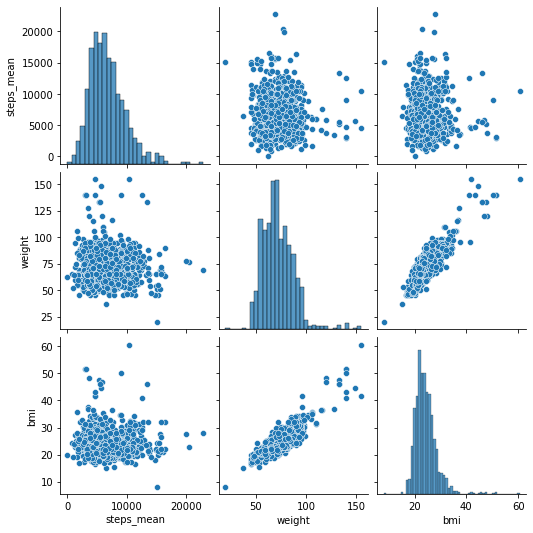

In [18]:
df_sel = df[['steps_mean','weight','bmi']] #a subset with some variables
sns.pairplot(df_sel)
plt.show()

It's not much of a surprise that weight correlates highly with BMI, since we used weight to calculate it. More interesting is the correlation between BMI and steps, this however does not look promising.
Let's run a correlation matrix.

In [19]:
corr = df_sel.corr()
corr

,steps_mean,weight,bmi
steps_mean,1.000000,-0.072743,-0.036000
weight,-0.072743,1.000000,0.868562
bmi,-0.036000,0.868562,1.000000


It's clear that the correlation between BMI and Steps is very low. It is however twice as hight as the correlation between weight and steps. However to predict steps we need other predictors to.

### Assignment 3: linear regression
We are going to create a linear regression model to predict steps. Since the numerical values, do not seem to be great predictors, we also need to rely on the categorical variables.
In the first step we will create dummies for gender, age. I left education out, since it did not see to influence steps that much. I also left city out, since I pressume that this does not matter that much.

In [20]:
df_dummies = pd.get_dummies(df,columns=['gender','age'],drop_first= True)
df_dummies.head()

,id,city,hh_size,education,education_1,height,weight,20-6-2013,21-6-2013,22-6-2013,...,12-5-2014,13-5-2014,steps_mean,bmi,gender_Male,age_35-44,age_45-54,age_55-64,age_65+,age_<25
0,1,Bordeaux,4,4,Master or doctorate,178.0,98.0,NaN,NaN,NaN,...,NaN,NaN,10205.521212,30.930438,1,0,0,0,0,0
1,2,Lille,1,3,Bachelor,180.0,77.0,NaN,NaN,10473.0,...,NaN,NaN,5687.423313,23.765432,1,1,0,0,0,0
2,3,Montpellier,2,2,Master or doctorate,180.0,83.0,NaN,11428.0,12523.0,...,1129.0,NaN,8301.729730,25.617284,1,0,0,0,0,0
3,4,Lyon,1,1,Bachelor,178.0,80.0,NaN,NaN,NaN,...,NaN,NaN,3633.200000,25.249337,1,0,0,0,0,1
4,5,Montpellier,3,4,Bachelor,167.0,61.0,NaN,NaN,NaN,...,NaN,NaN,5312.129630,21.872423,0,0,0,0,0,0


Next drop all columns we don't need, first run info, to get a list of indexes. I'm going to keep steps_mean (the dependent variable), bmi and the categorical values I dummified.

In [21]:
df_dummies.info(verbose='true')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 928
Data columns (total 343 columns):
 #    Column       Dtype  
---   ------       -----  
 0    id           int64  
 1    city         object 
 2    hh_size      int64  
 3    education    int64  
 4    education_1  object 
 5    height       float64
 6    weight       float64
 7    20-6-2013    float64
 8    21-6-2013    float64
 9    22-6-2013    float64
 10   23-6-2013    float64
 11   24-6-2013    float64
 12   25-6-2013    float64
 13   26-6-2013    float64
 14   27-6-2013    float64
 15   28-6-2013    float64
 16   29-6-2013    float64
 17   30-6-2013    float64
 18   1-7-2013     float64
 19   2-7-2013     float64
 20   3-7-2013     float64
 21   4-7-2013     float64
 22   5-7-2013     float64
 23   6-7-2013     float64
 24   7-7-2013     float64
 25   8-7-2013     float64
 26   9-7-2013     float64
 27   10-7-2013    float64
 28   11-7-2013    float64
 29   12-7-2013    float64
 30   13-7-2013    float64
 31

In [22]:
df_final=df_dummies.iloc[:,335:342]
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 917 entries, 0 to 928
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   steps_mean   917 non-null    float64
 1   bmi          916 non-null    float64
 2   gender_Male  917 non-null    uint8  
 3   age_35-44    917 non-null    uint8  
 4   age_45-54    917 non-null    uint8  
 5   age_55-64    917 non-null    uint8  
 6   age_65+      917 non-null    uint8  
dtypes: float64(2), uint8(5)
memory usage: 58.3 KB


Some of the bmi data is not available (NaN), but since this only accounts for 1 row, we are going to delete these row with dropna()

In [23]:
df_final=df_final.dropna()

Now we can create a test and training set and create a model

In [24]:
y = df_final['steps_mean']
X = df_final.loc[:, ~df_final.columns.isin(['steps_mean'])]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 56)

lm = LinearRegression()
model = lm.fit(X_train, y_train)

Let's create the formula, which is not necessary to continue, but does give us some insight into the model. Start with retrieving the intercept (b0) and the slopes (b1,b2 etc.) in this formula: $ y = b_0 + b_1x_1 + b_2x_2 + b_3x_3 .. b_nx_n + e$

In [25]:
lm.intercept_

7557.276837823334

In [26]:
pd.DataFrame(X.columns, lm.coef_)

,0
-37.238859,bmi
-528.729251,gender_Male
818.659019,age_35-44
734.933922,age_45-54
1648.358541,age_55-64
-376.052986,age_65+


the formula is something like:$ mean\_steps = -7557.3 --37.2*bmi-528.7*gender\_Male...$ etc.

Now let's evaluate the model's performance. We'll start by calculating the R2 and next the RMSE

In [27]:
y_test_p = lm.predict(X_test)
r2_score(y_test, y_test_p)

0.016407659979765676

It's clear that this model is not really prediting anything with an R2 score of 1.6%. Let's see how much the RMSE deviates for the real number of steps.

In [28]:
math.sqrt(mean_squared_error(y_test, y_test_p))

2893.797787342072

On average it predicts 2893 steps to much or to low.

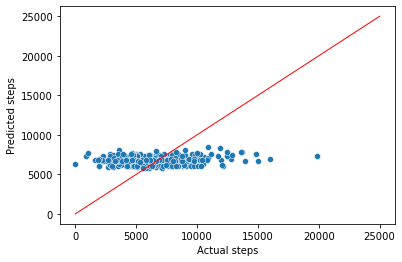

In [29]:
sns.scatterplot(x=y_test, y=y_test_p)
plt.xlabel('Actual steps')
plt.ylabel('Predicted steps')
plt.plot([0,25000], [0, 25000], color='red', lw=1) #plot a diagonal length
plt.show()

The model seems to predict almost always the same amount of steps, no matter wat the real ammount is.